In [1]:
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn.utils import plt
pd.set_option('display.max_rows', 6)
pd.set_option('display.max_columns', 500)
import matplotlib
plt.style.use('seaborn')
# display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML(open("../shared-resources/jupyter.css", "r").read()))
import mpld3

%matplotlib inline

ImportError: No module named 'mpld3'

# Entropy

Entropy - the amount of 'randomness' or 'surprise' in data.

[20-questions example](http://dsw.users.sonic.net/entropy.html)

Some code excerpts take [from here](http://nbviewer.ipython.org/github/fonnesbeck/Bios366/blob/master/notebooks/Section6_5-Decision-Trees.ipynb)

Shannon's 1948 paper [A Mathematical Theory of Communication](http://worrydream.com/refs/Shannon%20-%20A%20Mathematical%20Theory%20of%20Communication.pdf) is cited as the foundation of info theory.

Shannon's paper cites Hartley's [Transmission of Information (1928)](http://www3.alcatel-lucent.com/bstj/vol07-1928/articles/bstj7-3-535.pdf) as the originator of using the `log` function to model information for three reasons:

* Practicality. most technical system's capacity follows the log function
* Intuition.  Similar to the first, we think "two punched cards should have twice the capacity of one for information storage"
* Cleaner.  The limits of probability happen to match the limits of the log function.


In [7]:
def entropy(p, base=2):
    """ Calculate the entropy for a given probability or proportion 
    
    There's half a bit of entropy of information in an event wtih 50% probability:
    >>> entropy(.5, base=2)
    0.5
    
    There's more than 1/2 bit (shannon) in a 40% event. Why?
    >>> entropy(.4, base=2)
    0.52877123795494496
    """
    p = np.array(p)
    p[(p <= 0) | (p > 1)] = 1.
    return np.sum(-p * np.log(p) / np.log(base))

In [8]:
fig = plt.figure(5, figsize=(16,6))
plt.xlabel("p of the given state")
plt.ylabel("entropy contributed by the given state")
pvals = np.linspace(0, 1)  
ax = plt.plot(pvals, [entropy(p) for p in list(pvals)])

In [9]:
entropy(.4), entropy(.5), entropy(.6)

(0.52877123795494496, 0.5, 0.44217935649972379)

In [10]:
entropy(0.5) + entropy(0.5)

1.0

In [11]:
entropy([.5, .5])

1.0

In [12]:
# entropies don't sum to 1 even if their probabilities do
entropy(0.6) + entropy(0.4)

0.9709505944546688

In [13]:
entropy([1/3., 1/3., 1/3.])

1.5849625007211561

In [14]:
fig = plt.figure(6, figsize=(16,6))
plt.xlabel("p of state 1, out of 2 states")
plt.ylabel("entropy of system")
pvals = np.linspace(0, 1)  
ax = plt.plot(pvals, [entropy(p) + entropy(1 - p) for p in list(pvals)])

In [15]:
def value_entropy(values):
    values = np.array(values)
    unique_values, counts = np.unique(values, return_counts=True)
    freqs = counts.astype('float') / len(values)
    return entropy(freqs)


In [16]:
value_entropy(pd.Series([]))

0.0

In [17]:
x = pd.Series([1,0,0,1,1,1,0,0,1,1,0,1,1,1,0,0,0,0,1,1,0,0])
len(x)
value_entropy(x)

1.0

In [18]:
value_entropy(pd.Series([2,2,2,5]))

0.81127812445913283

## Your Turn

1. What is the entropy of the player in the 20-questions game above?
2. Play a game of 20-questions with your neighbor and try to maximize the entropy the answers to your questions.
3. Compute the entropy in a sequence of stock closing prices, converted to bits (for price goes up vs goes down)

  
  
  
  
  
  
  
  
  
  

In [19]:
df = pd.read_csv('../shared-resources/time_series/time-series-2010.csv', index_col=0, header=0, parse_dates=True)
df.head()

,goog_open,goog_high,goog_low,goog_close,goog_adj_close,goog_volume,ibm_open,ibm_high,ibm_low,ibm_close,ibm_adj_close,ibm_volume,ge_open,ge_high,ge_low,ge_close,ge_adj_close,ge_volume,tsla_open,tsla_high,tsla_low,tsla_close,tsla_adj_close,tsla_volume,aapl_open,aapl_high,aapl_low,aapl_close,aapl_adj_close,aapl_volume,open,high,low,close,2010-07-19 00:00:00
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-07-19,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000,1.000,NaN
2010-07-20,1.000043,1.028404,1.006732,1.033056,1.033056,0.891024,0.955701,0.970701,0.957623,0.975037,0.975037,1.947572,0.980874,1.018318,0.992398,1.021888,1.021888,1.371006,1.022461,0.982022,0.958413,0.926518,0.926518,0.734084,0.972067,1.012086,1.001711,1.025694,1.025694,1.049267,0.888889,0.888889,0.875,0.875,NaN
2010-07-21,1.049869,1.034174,1.039146,1.024282,1.024282,0.720736,0.982669,0.970241,0.970788,0.965175,0.965174,1.027049,1.032104,1.031208,1.011748,1.015048,1.015048,1.325004,0.966776,0.939326,0.932122,0.922866,0.922866,0.503720,1.060869,1.061109,1.060100,1.035263,1.035263,1.157342,0.777778,0.888889,0.875,1.000,NaN
2010-07-22,1.048199,1.041158,1.054555,1.039963,1.039963,0.471975,0.981736,0.980058,0.981927,0.982125,0.982125,0.823618,1.030055,1.037313,1.034554,1.040356,1.040356,1.310307,0.959289,0.955056,0.973709,0.958466,0.958466,0.385200,1.031215,1.040499,1.065568,1.054728,1.054727,0.629900,0.888889,0.888889,0.625,0.625,NaN
2010-07-23,1.042862,1.044586,1.049156,1.051225,1.051225,0.497631,0.989353,0.987882,0.989328,0.989136,0.989136,0.605345,1.038934,1.075305,1.038701,1.074555,1.074555,2.297298,0.991577,0.968989,1.006692,0.971702,0.971702,0.262859,1.028854,1.042020,1.069616,1.058474,1.058474,0.520644,0.555556,0.777778,0.625,0.750,NaN


In [22]:
updown = df.goog_open.diff() > 0
print(updown)
value_entropy(updown.values)

date
2010-07-19    False
2010-07-20     True
2010-07-21     True
              ...  
2017-10-05    False
2017-10-06     True
2017-10-09     True
Name: goog_open, Length: 1821, dtype: bool


0.99777980927749177














----

## 20 questions for flower identification!

We'll use the sklearn Iris Data set.

We'll build a **decision tree** in raw python.  

We'll train it by maximizing the entropy at each decision "branch" of the tree.  

In [23]:
from sklearn import datasets
import pandas as pd
import numpy as np
from seaborn.utils import plt

iris = datasets.load_iris()
data_t0 = np.array([row for i, row in enumerate(iris.data) if iris.target[i] == 0])
data_t1 = np.array([row for i, row in enumerate(iris.data) if iris.target[i] == 1])
data_t2 = np.array([row for i, row in enumerate(iris.data) if iris.target[i] == 2])
# df = pd.DataFrame([[row for i,row in enumerate(iris_data.data) if iris_data.target[i] == t] for t in range(3)]).T
# df.columns = ['t{}'.format(i) for i in range(3)]
# df.head()

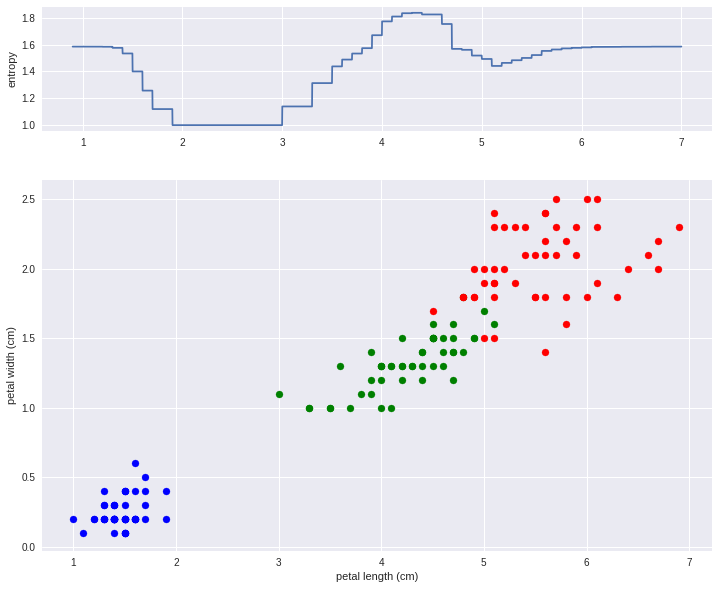

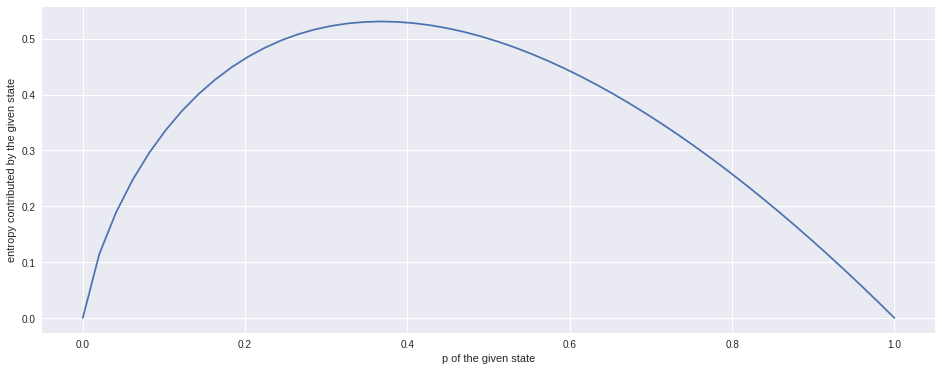

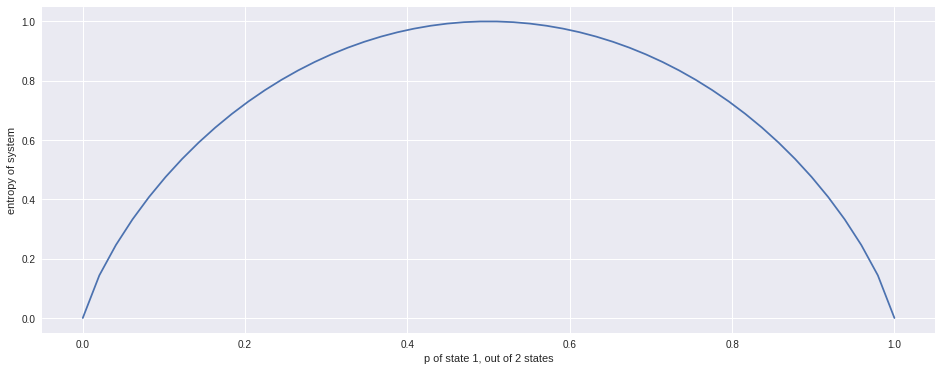

In [24]:
figure, subplot = plt.figure, plt.subplot

from matplotlib import gridspec

entropy = lambda p: -p * np.log2(p) if p > 0. else 0

def entropy_of_list(list_of_number_of_occurrences):
    total_N = sum(list_of_number_of_occurrences)
    
    if total_N == 0:
        return 0.
    
    total_entropy = 0.
    for state in list_of_number_of_occurrences:
        total_entropy += entropy(float(state)/total_N)
    
    return total_entropy


step = 0.001

data_d2l = np.array([[row[2],iris.target[i]] for i,row in enumerate(iris.data)])
e_x = np.arange(0.9,7+step,step)
entropies = []
for cutoff in e_x:
    left_list = [int(c) for [x,c] in data_d2l if x < cutoff]
    right_list = [int(c) for [x,c] in data_d2l if x >= cutoff]
    
    left_counts = [0,0,0]
    for c in left_list:
        left_counts[c] += 1
    
    right_counts = [0,0,0]
    for c in right_list:
        right_counts[c] += 1
    
    left_entropy = entropy_of_list(left_counts)
    right_entropy = entropy_of_list(right_counts)

    entropies.append(left_entropy + right_entropy)
    
# plot it
fig = figure(10,figsize=(12, 10)) 
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 3]) 
ax0 = subplot(gs[0])
ax0.plot(e_x,entropies)
ax0.set_ylabel("entropy")
# ax0.set_xlim([0.9,7.])
# ax0.set_ylim([0.9,1.9])


ax1 = subplot(gs[1])
ax1.scatter(data_t0[:,2], data_t0[:,3], color = 'b', label=iris.target_names[0])
ax1.scatter(data_t1[:,2], data_t1[:,3], color = 'g', label=iris.target_names[1])
ax1.scatter(data_t2[:,2], data_t2[:,3], color = 'r', label=iris.target_names[2])
ax1.set_xlabel("petal length (cm)")
ax1.set_ylabel("petal width (cm)")
# ax1.set_xlim([0.9,7.])
# ax1.set_ylim([0,2.6])
plt.show()